### Subject 1
API, DataReader library 혹은 Web Crawling을 활용해 일정 기간동안 3개 이상의 Index 지표를 Plotting하고 Recession기간을 음영 처리하여 주석과 함께 표시하세요

In [17]:
import pandas_datareader as wb
import numpy as np, pandas as pd
import datetime

start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2023, 2, 17)
df = wb.DataReader("KOSPI", "naver", start, end)

In [14]:
price = df.Close
price.head() # 종가 데이터만 Series로 저장

Date
2022-01-03    2988.77
2022-01-04    2989.24
2022-01-05    2953.97
2022-01-06    2920.53
2022-01-07    2954.89
Name: Close, dtype: object

In [15]:
import matplotlib.pyplot as plt
price = pd.DataFrame(price.astype(float).values, columns = ['price'], index = price.index)

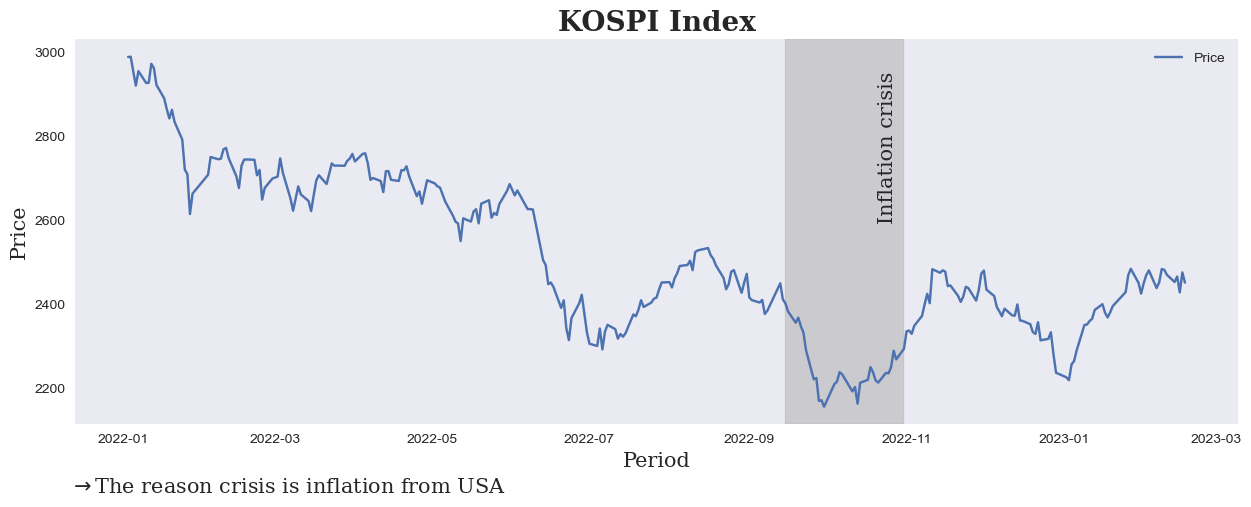

In [16]:
plt.style.use('seaborn') 
plt.figure(figsize = (15,5))
plt.grid(False) # grid 표시 설정가능
plt.plot(price, label = 'Price') 
plt.legend(loc = 'upper right') 
plt.xlabel('Period', fontsize = 15, fontfamily = 'Serif') 
plt.ylabel('Price', fontsize = 15, fontfamily = 'Serif') 
plt.axvspan('2022-09-15', '2022-10-31', color = 'gray', alpha = 0.3) # axvspan() : 정해진 구간동안 회색 음영 처리 가능
plt.title('KOSPI Index', fontsize = 20, fontweight = 'bold', fontfamily = 'Serif')
plt.text(19286, 2600, 'Inflation crisis', ha = 'left', fontsize = 15, fontfamily = 'Serif', rotation = 90)
# rotation argument를 통해 개체를 회전시킬 수 있다
plt.text(18972, 1950 , r'$\rightarrow$The reason crisis is inflation from USA', ha = 'left', fontsize = 15, fontfamily = 'Serif')
# text method를 통해서 text를 집어넣을 수 있다
plt.show() # show() method 사용시 여러개의 그래프를 한번에 표시 가능하다

### Subject 2
- 현재까지 과제에서 진행된 식들과 투자에 대한 기술 지표들을 자동으로 계산해 주는 method를 포함한 Class들을 제작하고 py파일로 저장하세요
- property를 사용해 보호모드로 접근해도 되고, 생성자에서 여러개의 parameter를 입력하는 방식도 상관 없습니다
- 양식은 자유이되, method가 총합 10개 이상이 되도록 하세요

In [1]:
%%writefile subject2.py
class CalValue(object) :
    def __init__(self) :
        self._present = 0
        self._future = 0
        self._interest = 0
        self._period = 0
    
    @property
    def present(self) :
        return self._present
    
    @present.setter
    def present(self, value) :
        self._present = value
    
    @property
    def future(self) :
        return self._future
    
    @future.setter
    def future(self, value) :
        self._future = value
    
    @property
    def interest(self) :
        return self._interest
    
    @interest.setter
    def interest(selt, value) :
        self._interest = value
        
    @property
    def period(self) :
        return self._period
    
    @period.setter
    def period(selt, value) :
        self._period = value
    
    def future_to_present(self) :
        self._present = self._future / (1 + self._interest) ** self._period
        return self._present
    
    def present_to_future(self) :
        self._future = self._present * (1 + self._interest) ** self._period
        return self._present

Writing subject2.py


### Subject 3
`Portfolio Theory`
- Portfolio Theory는 자산군의 집합인 포트폴리오에서 개별 종목들의 수익률에 대한 공분산을 mean variance 평면에 표시한 것입니다
- 동일 수익률 대비 최소의 risk를, 동일 risk대비 최대의 return을 표시한 부분을 `Efficient Frontier`라고 합니다
<center><img src = "https://miro.medium.com/max/737/1*qQMmz8u_9xWS5uLiEvV44Q.png" alt="My Image"></center>

6개의 종목을 선정한 뒤, 종목들의 수익률을 계산하고 수익률들에 대한 공분산을 도출해 Mean Variance 평면에 Plotting하세요

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_datareader.data as web

data = pd.DataFrame()
for code in ['005930','028260','000660','068270','051910','006400','005380','035420','000270','005490'] : 
    data = pd.concat([data,web.DataReader(code, 'naver', start='2019-01-01', end='2023-02-24')['Close'].astype(float)], axis=1)

data.columns = ['005930','028260','000660','068270','051910','006400','005380','035420','000270','005490']
noa = len(data.columns)
data.head()

,005930,028260,000660,068270,051910,006400,005380,035420,000270,005490
2019-01-02 00:00:00,38750.0,104000.0,60600.0,190215.0,337000.0,210500.0,114000.0,118000.0,32800.0,237000.0
2019-01-03 00:00:00,37600.0,104500.0,57700.0,186669.0,328000.0,203000.0,116500.0,122000.0,32850.0,237000.0
2019-01-04 00:00:00,37450.0,107000.0,58300.0,195093.0,330500.0,201000.0,119500.0,125500.0,34850.0,239000.0
2019-01-07 00:00:00,38750.0,108000.0,58700.0,191545.0,343000.0,217000.0,120500.0,131500.0,34200.0,246000.0
2019-01-08 00:00:00,38100.0,107000.0,59200.0,189328.0,349500.0,218500.0,119500.0,130000.0,33800.0,245500.0


In [21]:
data

,005930,028260,000660,068270,051910,006400,005380,035420,000270,005490
2019-01-02,38750.0,104000.0,60600.0,190215.0,337000.0,210500.0,114000.0,118000.0,32800.0,237000.0
2019-01-03,37600.0,104500.0,57700.0,186669.0,328000.0,203000.0,116500.0,122000.0,32850.0,237000.0
2019-01-04,37450.0,107000.0,58300.0,195093.0,330500.0,201000.0,119500.0,125500.0,34850.0,239000.0
2019-01-07,38750.0,108000.0,58700.0,191545.0,343000.0,217000.0,120500.0,131500.0,34200.0,246000.0
2019-01-08,38100.0,107000.0,59200.0,189328.0,349500.0,218500.0,119500.0,130000.0,33800.0,245500.0
...,...,...,...,...,...,...,...,...,...,...
2023-02-20,62700.0,115300.0,92500.0,157000.0,667000.0,692000.0,178200.0,219000.0,76300.0,346000.0
2023-02-21,62100.0,114900.0,91200.0,154800.0,687000.0,692000.0,178200.0,215500.0,76600.0,346000.0
2023-02-22,61100.0,113200.0,89100.0,149000.0,666000.0,684000.0,174200.0,211500.0,74500.0,332000.0
2023-02-23,62000.0,113100.0,92700.0,149000.0,668000.0,681000.0,176200.0,213500.0,76400.0,331500.0


#### Random Portfolio (random weights)

In [22]:
weights = np.random.random(noa)
weights /= sum(weights)

In [23]:
# get returns
ret = data.pct_change().dropna()

# use sample mean and variance as estimates of expected portfolio return and variance
port_mean = np.sum(weights * ret.mean() * 1026) # sample mean
port_var = np.dot(weights.T, np.dot(ret.cov() * 1026, weights)) #sample variance
port_std = np.sqrt(port_var) # sample standard deviation

In [26]:
port_rets = []
port_std = []

def ret_std(weight, ret):
    port_mean = np.sum(weight * ret.mean() * 1026)
    port_var = np.dot(weight.T, np.dot(ret.cov() * 1026, weight))
    port_std = np.sqrt(port_var)
    return port_mean, port_std

for w in range(50000):
    weight = np.random.random(noa)
    weight /= np.sum(weight)
    mu, sig = ret_std(weight, ret)
    port_rets.append(mu)
    port_std.append(sig)

sharpe_ratio = np.array(port_rets)/np.array(port_std)

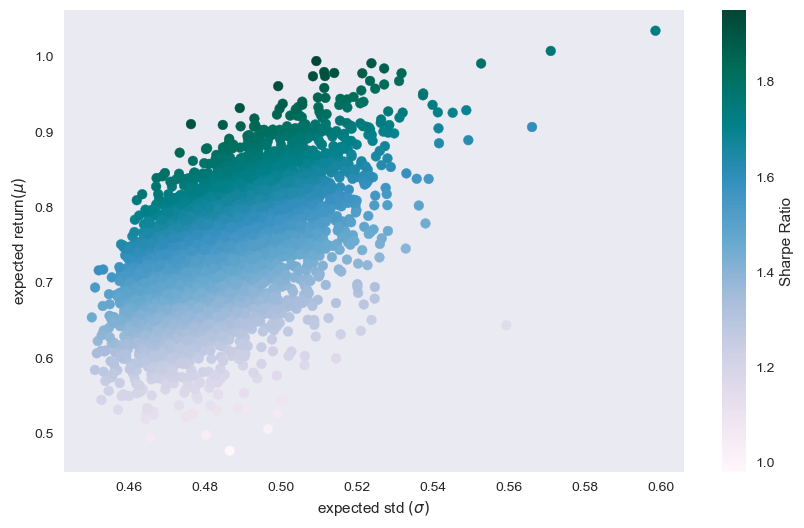

In [25]:
plt.style.use('seaborn')
plt.figure(figsize=(10,6))
plt.scatter(port_std, port_rets, c = sharpe_ratio, marker = 'o',  cmap='PuBuGn')
plt.colorbar(label='Sharpe Ratio')
plt.ylabel('expected return$(μ)$')
plt.xlabel('expected std $(σ)$');
plt.grid()

### Subject 4

수업시간에 사용한 Korean Income 데이터를 활용해 각 feature들을 하나하나 확인한 후, 4개의 feature를 선정해 전처리가 필요한 경우 적절한 Data preprocessing을 진행한 뒤, 적절한 Plotting을 수행하세요